In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis import GetRawData, GetAllConfusionMatrices, SumConfusionMatrices, AnalyticsOnConfusionMatrices, ListOfRawDataToDifferentSameOneArrays
from plots import PlotConfusionMatrixSchema, PlotHist2dConfusionMatrices, PlotPpvNpv

In [2]:
exData = GetRawData(["../Data/TABS/Output/cd5c0249-45e8-4c4f-baa7-b5b120c8e3e6_rmsds.txt","../Data/TABS/Output/44e334bb-712b-40c7-ba85-58443ca71154_rmsds.txt"])

In [3]:
rmsdThresholds = np.arange(0.1,2.5,0.1)

In [4]:
cmsPerMol = GetAllConfusionMatrices(exData,rmsdThresholds)

In [5]:
summedMediumCms = SumConfusionMatrices(cmsPerMol,rmsdThresholds)

In [6]:
ppvMedium, npvMedium = AnalyticsOnConfusionMatrices(summedMediumCms)

In [7]:
same, different = ListOfRawDataToDifferentSameOneArrays(exData)

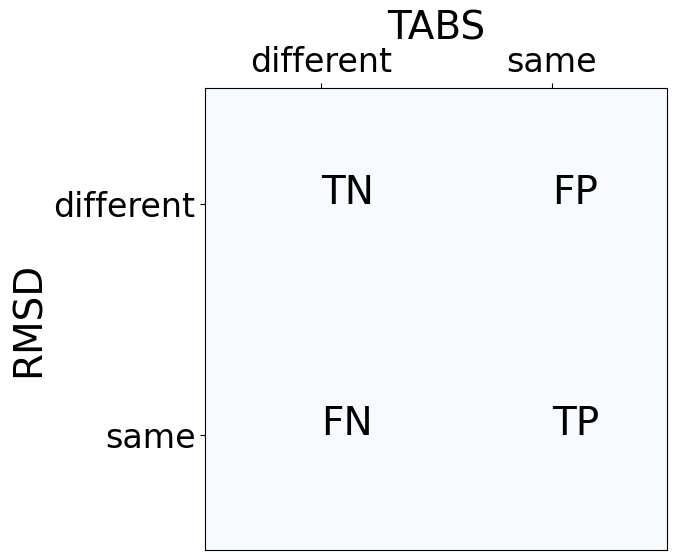

In [8]:
PlotConfusionMatrixSchema();

/home/braunje/RinikerlabGithub/TorsionAngularBinStrings/Analysis/plots.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(range(0,7),fontsize=22)


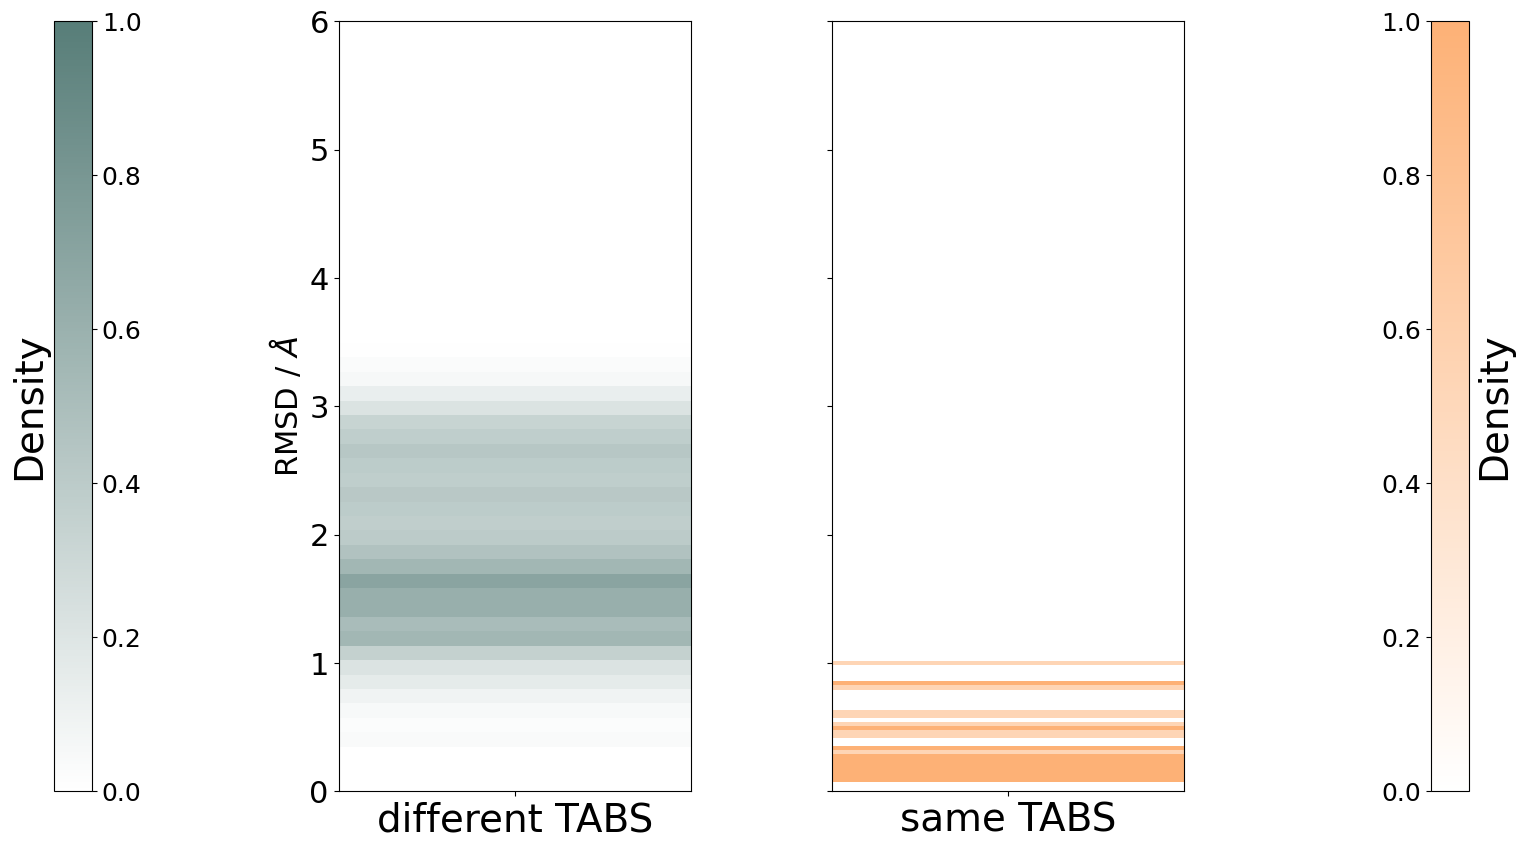

In [9]:
PlotHist2dConfusionMatrices(same,different);

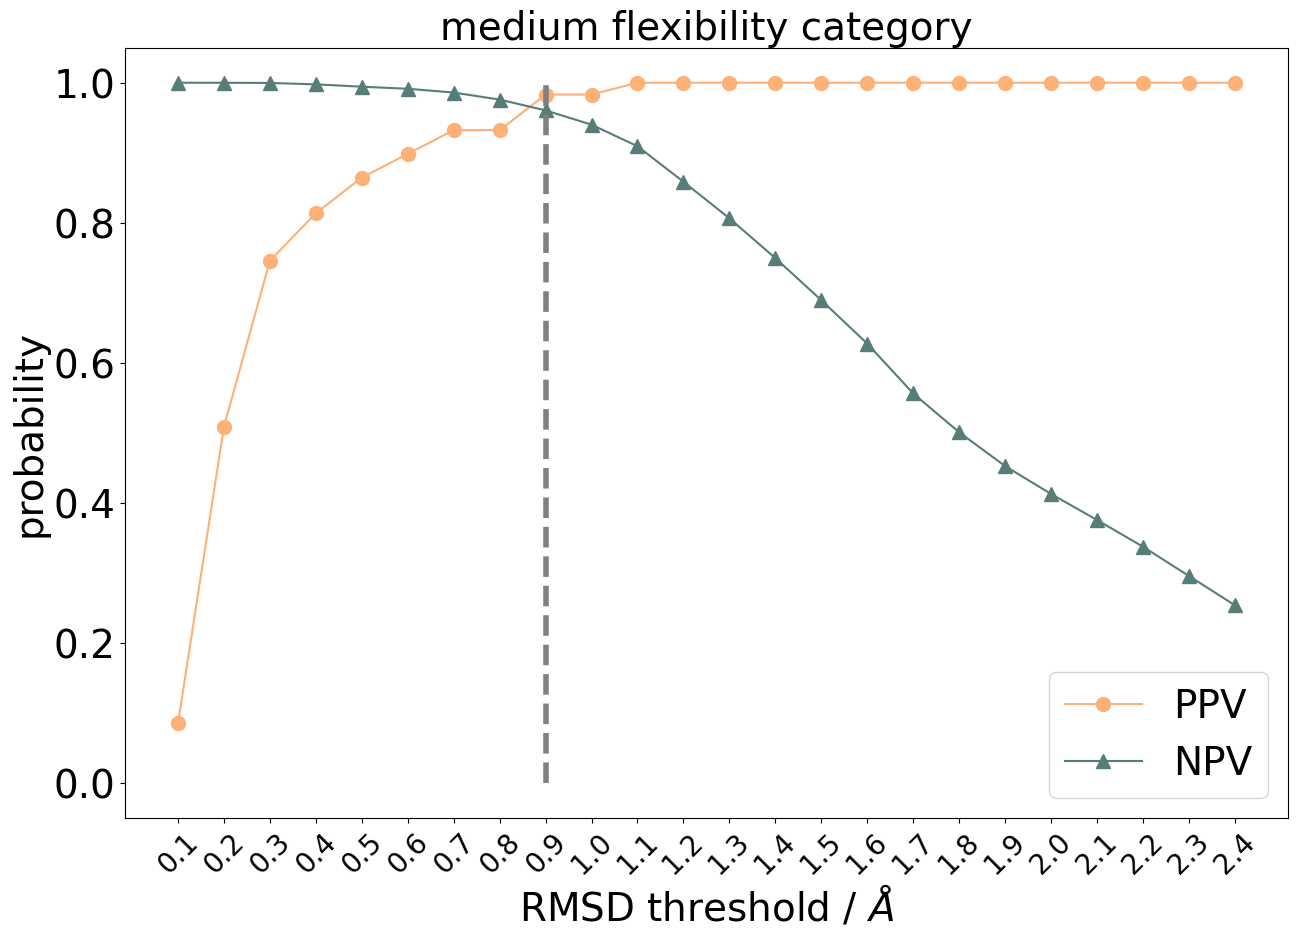

In [10]:
PlotPpvNpv(summedMediumCms,npvMedium, ppvMedium, "medium");